In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import keras
import glob
import matplotlib.pyplot as plt
import scipy
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input, BatchNormalization, Multiply, Activation
from keras.optimizers import RMSprop, SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import backend as K


Using TensorFlow backend.


In [ ]:
food = ['apple_pie','chicken_curry', 'french_fries','fried_rice'] 
apple = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/train/'+food[0]+'/*')
french = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/train/'+food[2]+'/*')
chicken = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/train/'+food[1]+'/*')
apple_test = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/test/'+food[0]+'/*')
french_test = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/test/'+food[2]+'/*')
chicken_test = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/test/'+food[1]+'/*')
fried_test = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/test/'+food[3]+'/*')
fried = glob.glob('../content/drive/My Drive/Colab Notebooks/deep/train/'+food[3]+'/*')
print('Number of images per class:\n\t\ttrain\ttest \nApple_pie:\t{}\t{}\nfrenchfries:\t{}\t{}\nchicken:\t{}\t{}\nfriedrice:\t{}\t{}'
      .format(len(apple),len(apple_test),len(french),len(french_test),len(chicken),len(chicken_test),len(fried),len(fried_test)))

Number of images per class:
		train	test 
Apple_pie:	750	250
frenchfries:	750	250
chicken:	750	250
friedrice:	750	250


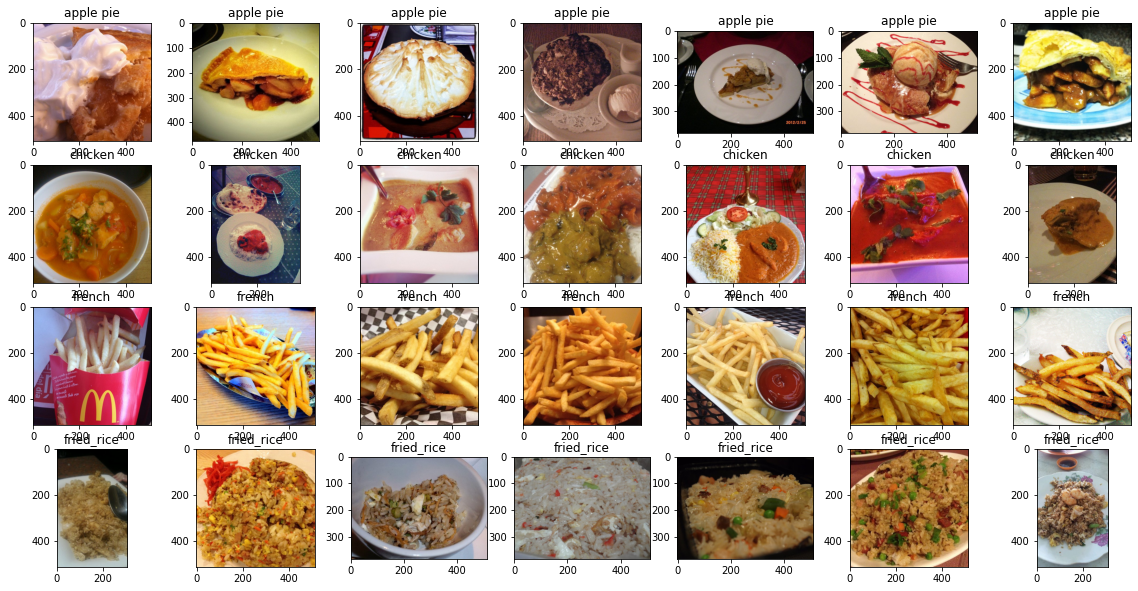

In [ ]:
n = 7
fig, axes = plt.subplots(4,n,figsize=(20,10))

for i in range(n):
    axes[0, i].imshow(plt.imread(apple[i]))
    axes[0, i].set_title('apple pie')
    axes[1, i].imshow(plt.imread(chicken[i]))
    axes[1, i].set_title('chicken')
    axes[2, i].imshow(plt.imread(french[i]))
    axes[2, i].set_title('french')
    axes[3, i].imshow(plt.imread(fried[i]))
    axes[3, i].set_title('fried_rice')

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 rotation_range=5,
                 width_shift_range=0.05,
                 height_shift_range=0.05,
                 shear_range=0.2,
                 zoom_range=0.2,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        "../content/drive/My Drive/Colab Notebooks/deep/train",
        target_size=(224,224),
        batch_size=64)


Found 3000 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
        "../content/drive/My Drive/Colab Notebooks/deep/test",
        target_size=(224,224),
        batch_size=64)

Found 1000 images belonging to 4 classes.


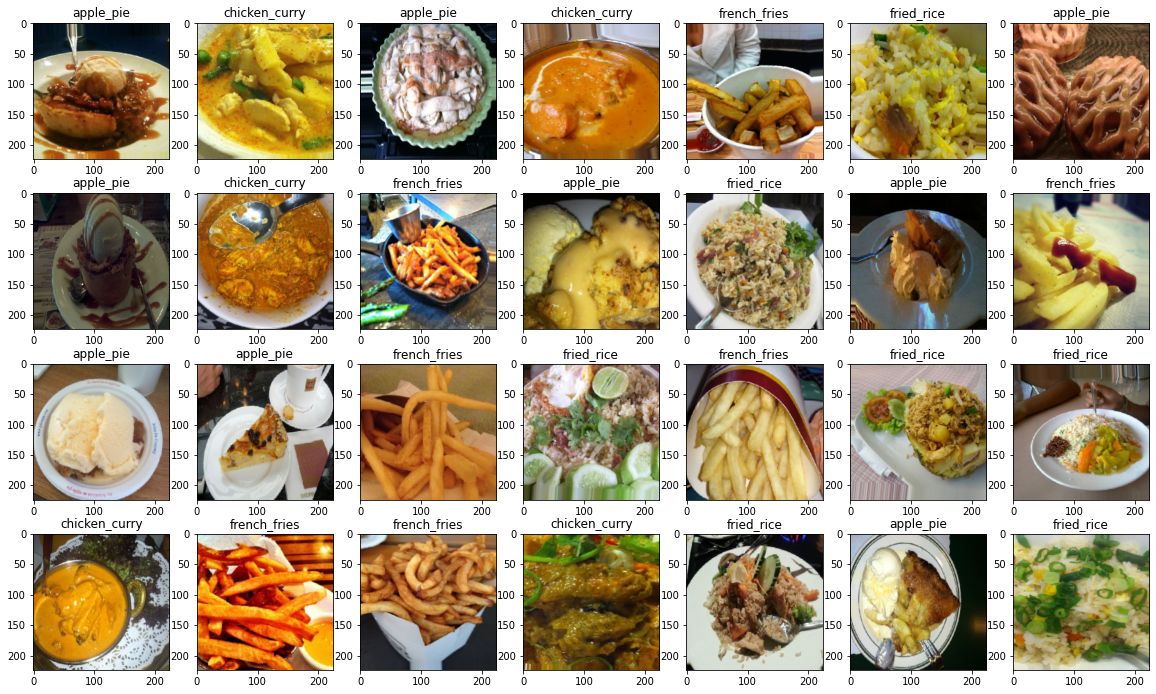

In [ ]:
r = 4; c = 7
n=0
classtolabel = {'0':'apple_pie','1':'chicken_curry','2':'french_fries','3':'fried_rice'}
for x in train_generator:
    fig, axes = plt.subplots(r,c,figsize=(20,12))
    for i in range(r):
        for j in range(c):
            axes[i,j].imshow(x[0][n])
            label = np.argmax(x[1],axis=1)[n].astype('str')
            axes[i,j].set_title(classtolabel[label])
            n+=1    
    break

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), strides = 2, padding = 'Same', activation ='relu', input_shape = (224,224,3), kernel_initializer='he_normal'))
model.add(Conv2D(filters = 32, kernel_size = (5,5), strides = 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = "relu",kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax",kernel_initializer='he_normal',kernel_regularizer=l2()))
checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, mode='auto')
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, mode='auto')

model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)       

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=3000/16,
                              validation_data=test_generator,validation_steps=1000/16, 
                              epochs=40, callbacks=[checkpointer, reduceLR, earlystopping])

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


  1/187 [..............................] - ETA: 3:31:14 - loss: 2.6930 - accuracy: 0.2812

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/187 [..............................] - ETA: 3:24:28 - loss: 2.3072 - accuracy: 0.2344

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


KeyboardInterrupt: ignored

In [ ]:

model.save_weights('model_wwweights.h5')
with open('model_architecccture.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = test_datagen.flow_from_directory(
        "../content/drive/My Drive/Colab Notebooks/deep/test",
        target_size=(224,224),
        batch_size=750)

In [ ]:
x_test, y_test = val_generator.next()
y_pred_conf = model.predict(x_test)
y_pred = np.argmax(y_pred_conf,axis=1)
y_label = np.argmax(y_test,axis=1)
print('Accuracy score: {:.1f}%'.format(accuracy_score(y_pred,y_label)*100))

In [ ]:
ind = np.random.randint(1,len(x_test),5)
f, ax=plt.subplots(1,5,figsize=(20,10))
for i,j in enumerate(ind):
    ax[i].imshow(x_test[j])
    ax[i].set_title("Pred :{}({:.2f})\nTrue :{}({:.2f})".format
                          (classtolabel[str(y_pred[j])],np.max(y_pred_conf[j]),
                           classtolabel[str(y_label[j])],y_pred_conf[j][(y_label[j])],fontweight="bold", size=20))

In [ ]:
def plot_hist(history):
    f,ax = plt.subplots(2,1,figsize=(15,10))
    ax[0].plot(history.history['accuracy'],c='C2')
    ax[0].plot(history.history['val_accuracy'],c='C3')
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    ax[1].plot(history.history['loss'],c='C0')
    ax[1].plot(history.history['val_loss'],c='C1')
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    
plot_hist(history)

In [ ]:
np.save('my_history.npy',history.history)

In [ ]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix',fontsize=15)
    plt.colorbar()
    classes = ['apple_pie','chicken_curry','french_fries','fried_rice']
    plt.xticks([0,1,2,3], classes, fontsize=10)
    plt.yticks([0,1,2,3], classes, fontsize=10,rotation=90,verticalalignment="center")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > np.max(cm)/2. else "black")
    plt.xlabel('Predicted label',fontsize=15)
    plt.ylabel('True label',fontsize=15)
    
plot_confusion_matrix(confusion_matrix(y_label,y_pred))

In [ ]:
from keras.models import model_from_json
with open('architecccture.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('wwweights.h5')

In [ ]:
x_test, y_test = val_generator.next()
y_pred_conf = model.predict(x_test) 
y_pred = np.argmax(y_pred_conf,axis=1)
y_label = np.argmax(y_test,axis=1)
print('Accuracy score: {:.1f}%'.format(accuracy_score(y_pred,y_label)*100))

In [ ]:
ind = np.random.randint(1,len(x_test),5)
f, ax=plt.subplots(1,5,figsize=(20,10))
for i,j in enumerate(ind):
    ax[i].imshow(x_test[j])
    ax[i].set_title("Pred :{}({:.2f})\nTrue :{}({:.2f})".format
                          (classtolabel[str(y_pred[j])],np.max(y_pred_conf[j]),
                           classtolabel[str(y_label[j])],y_pred_conf[j][(y_label[j])],fontweight="bold", size=20))

In [ ]:
his=np.load('/content/drive/My Drive/Colab Notebooks/my_history.npy',allow_pickle='TRUE').item()

In [ ]:
def plot_hist(history):
    f,ax = plt.subplots(2,1,figsize=(15,10))
    ax[0].plot(history['accuracy'],c='C2')
    ax[0].plot(history['val_accuracy'],c='C3')
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    
    # summarize history for loss
    ax[1].plot(history['loss'],c='C0')
    ax[1].plot(history['val_loss'],c='C1')
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    
plot_hist(his)

In [ ]:
print(classification_report(y_label, y_pred, target_names=food))